In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/training_set_VU_DM.csv')

In [3]:
df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [4]:
df_no_random = df.query('random_bool==0')
df_no_random.merge(df_no_random.groupby('srch_id').agg(srch_id_count=('srch_id', 'count')), on='srch_id')[['srch_id', 'srch_id_count', 'prop_id', 'position', 'booking_bool', 'click_bool']].groupby(['srch_id_count', 'position']).agg(position=('position', 'count'), booking_prob=('booking_bool', 'mean'), click_prob=('click_bool', 'mean'))

position  booking_prob  click_prob
srch_id_count position                                    
5             1             2899      0.367023    0.397723
              2             2895      0.229706    0.257686
              3             2892      0.156639    0.175657
              4             2713      0.117213    0.136380
              5              239      0.008368    0.008368
...                          ...           ...         ...
38            34               3      0.000000    0.000000
              35               3      0.000000    0.000000
              36               3      0.000000    0.000000
              37               3      0.000000    0.000000
              38               3      0.000000    0.000000

[1161 rows x 3 columns]

In [5]:
# number of search results - per search id
df = df.merge(df.groupby('srch_id').agg(prop_count = ('srch_id', 'count')), on='srch_id')

In [6]:
# top-5 percentage: out of all the times the property appeared, how many times was it in top-5
tmp = df.groupby('prop_id').agg(top_5_prob_prop_id = ('position', lambda x: (x <= 5).mean()), log_appearance_count_prop_id=('position', lambda x: np.log(len(x))), avg_res_len_prop_id=('prop_count', 'mean'))
tmp
# top-5 p-val

,top_5_prob_prop_id,log_appearance_count_prop_id,avg_res_len_prop_id
prop_id,,,
1,0.000000,4.110874,31.393443
2,0.000000,2.397895,14.818182
3,0.048780,4.406719,32.451220
4,0.181818,3.091042,25.590909
5,0.133333,3.401197,26.933333
...,...,...,...
140817,0.333333,1.098612,17.666667
140818,0.000000,1.098612,30.666667
140819,0.000000,0.693147,29.000000


In [ ]:
len(df), len(df_no_random)

In [ ]:
df_random = df.query('random_bool==1')
df_random.merge(df_random.groupby('srch_id').agg(srch_id_count=('srch_id', 'count')), on='srch_id')[['srch_id', 'srch_id_count', 'prop_id', 'position', 'booking_bool', 'click_bool']].groupby(['srch_id_count', 'position']).agg(position=('position', 'count'), booking_prob=('booking_bool', 'mean'), click_prob=('click_bool', 'mean'))

In [ ]:
# rebase the positions
#
# Why do positions greater than X appear in in searches with only X results? How can this be? If a search ID only has 5 properties, howcome position 7 appears 23 times?
#
weird_search_ids = df.merge(df.groupby('srch_id').agg(srch_id_count=('srch_id', 'count')), on='srch_id')[['srch_id', 'srch_id_count', 'prop_id', 'position', 'booking_bool', 'click_bool']].query('position==5 and srch_id_count==5').srch_id.unique()

In [ ]:
df[df.srch_id.isin(weird_search_ids)][['srch_id', 'prop_id', 'position', 'booking_bool', 'click_bool']]

In [22]:
# let's check the the booking day histogram

def convert_date(df):
    df['date_time'] = pd.to_datetime(df['date_time'])
    df['booking_week'] = df['date_time'].dt.isocalendar().week
    df['booking_month'] = df['date_time'].dt.month
    df['booking_dayofyear'] = df['date_time'].dt.dayofyear
    df['booking_dayofweek'] = df['date_time'].dt.dayofweek
    midstay = df['date_time'] + pd.to_timedelta(df.srch_booking_window, unit='days') + pd.to_timedelta(df.srch_length_of_stay//2, unit='days')
    df['midstay_week'] = midstay.dt.isocalendar().week
    df['midstay_month'] = midstay.dt.month
    df['midstay_dayofyear'] = midstay.dt.dayofyear
    df['midstay_dayofweek'] = midstay.dt.dayofweek


convert_date(df)

<Axes: >

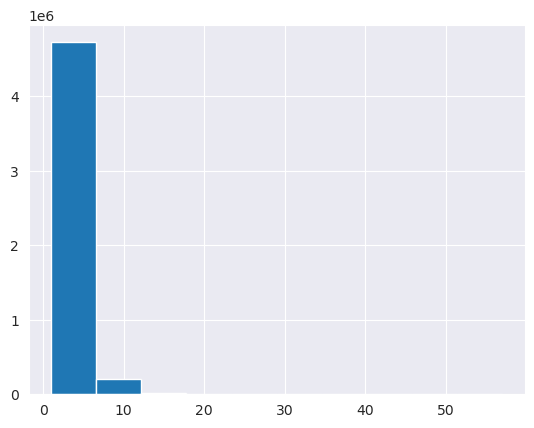

In [31]:
df.srch_length_of_stay.hist()

<Axes: xlabel='booking_dayofyear', ylabel='Count'>

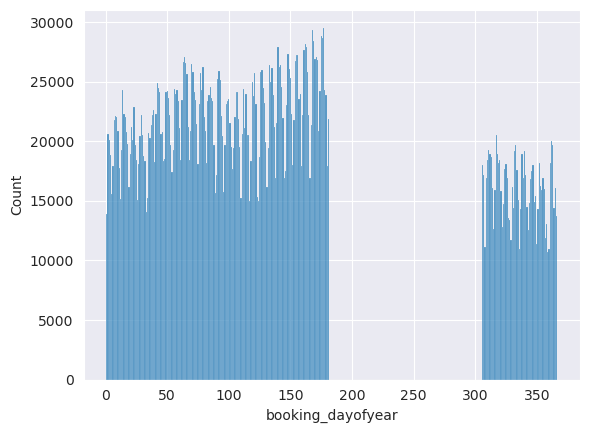

In [23]:
import seaborn as sns
sns.histplot(df, x='booking_dayofyear', discrete=True)

<Axes: xlabel='midstay_dayofyear', ylabel='Count'>

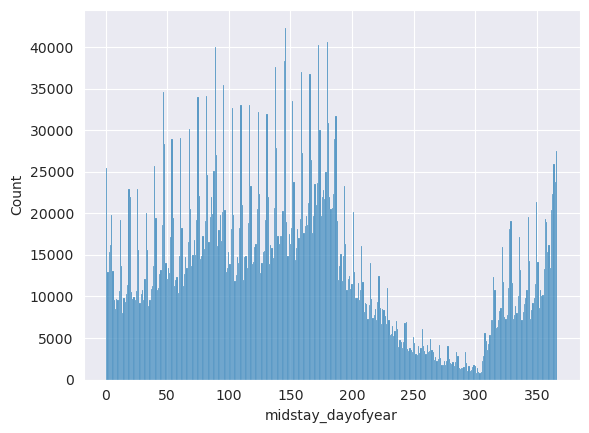

In [29]:
sns.histplot(df, x='midstay_dayofyear', discrete=True)

In [ ]:
sns.histplot(df, x='srch_booking_window', hue='click_bool', discrete=True, log_scale=(False, True))

In [ ]:
df_test = pd.read_csv('data/test_set_VU_DM.csv')

convert_date(df_test)

In [ ]:
sns.histplot(df_test, x='booking_dayofyear', discrete=True)

In [ ]:
sns.histplot(df_test, x='booking_start_dayofyear', discrete=True)

In [ ]:
tmp = df[df.prop_log_historical_price > 0][['prop_log_historical_price', 'price_usd']]
tmp['price_usd_log_exp'] = np.exp(tmp.prop_log_historical_price)
tmp['price_usd_log_2pow'] = 2**tmp.prop_log_historical_price
tmp['price_usd_log_10pow'] = 10**tmp.prop_log_historical_price
tmp

In [ ]:
df_exp = pd.read_csv('data/expedia-personalized-sort/train.csv')

In [ ]:
df_exp_test = pd.read_csv('data/expedia-personalized-sort/test.csv')

In [ ]:
df_exp.query('srch_id==1')

In [ ]:
df.query('srch_id==1')

In [ ]:
df_test.query('site_id==24 and prop_id==3180 and srch_destination_id==19222')

In [ ]:
df_exp.query('site_id==24 and prop_id==3180 and srch_destination_id==19222')

In [ ]:
srch_id_offset = 332788-1
df_exp['srch_id'] = df_exp['srch_id'] - srch_id_offset
df_exp

In [ ]:
tmp1 = df_test.set_index(['srch_id', 'prop_id'])
tmp2 = df_exp.set_index(['srch_id', 'prop_id'])

In [ ]:
isect_index = tmp1.index.intersection(tmp2.index)
tmp2 = tmp2.reindex(isect_index)
tmp2

In [ ]:
tmp2.to_csv('data/test_revealed.csv')

In [ ]:
# new feature idea: booked_or_clicked_or_top5pos
# try adding features to the model -> scores for optimizing different ndgc
# perhaps using ndgc@4 works better? because of the weird position bias for position 5?